In [11]:
import json
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

In [5]:
def get_api_key(path):
    try:
        with open(path, 'r') as file:
            content = json.load(file)
            api_key = content['api_key']
            return api_key
    except FileNotFoundError:
        print("Error : JSON file was not found")
        return None
    except json.JSONDecodeError:
        print("Error : JSON file is invalid")
        return None
    except KeyError:
        print("Erreur : key 'api_key' is not defined in JSON file")
        return None

In [8]:

path = '../secrets/api_key.json'
api_key = get_api_key(path)
print(api_key)
# Initialiser l'objet TimeSeries
ts = TimeSeries(key=api_key, output_format='pandas')

# Récupérer les données journalières pour IBM
data, meta_data = ts.get_daily(symbol='IBM', outputsize='full')

data.head()

J6SKRNV7DUZAPSDF


,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-07-19,186.33,187.00,181.95,183.25,3816039.0
2024-07-18,186.64,189.47,185.10,185.22,3487808.0
2024-07-17,185.44,187.94,185.07,187.45,4225302.0
2024-07-16,184.67,186.60,184.52,185.81,3374526.0
2024-07-15,183.38,184.90,182.60,182.88,2925794.0


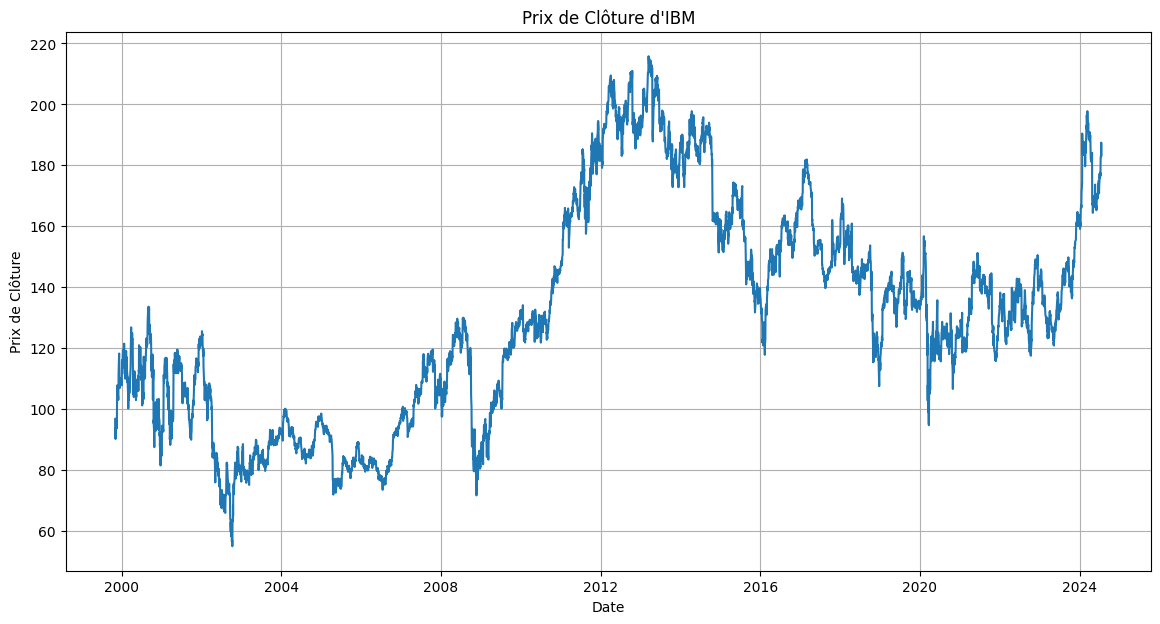

In [12]:
# Tracer le prix de clôture
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['4. close'])
plt.title('Prix de Clôture d\'IBM')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture')
plt.grid(True)
plt.show()